In [1]:
from telegram_notifier import TelegramNotifier
from fastai.vision import *

Now we will just do the basic vision example [from the fastai website](https://docs.fast.ai/tutorial.data.html#A-classification-problem), but now using the telegram notifier callback.

d:\utilities\anaconda\envs\fastai-env\lib\site-packages\torch\cuda\__init__.py:118: UserWarning: 
    Found GPU0 GeForce GTX 680 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


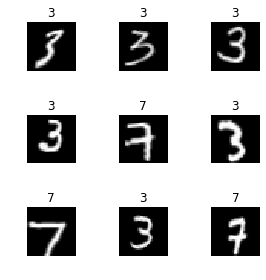

In [2]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)
data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))
data.show_batch(rows=3, figsize=(4,4))

In [5]:
my_chat_id = None # Put your chat id here, e.g something like 921739018
my_telegram_bot_token = None # Put your telegram bot token here

learn = cnn_learner(data, 
                    models.resnet18, 
                    metrics=accuracy, 
                    callback_fns=[partial(
                        TelegramNotifier, 
                        chat_id=my_chat_id, 
                        token=my_telegram_bot_token)])

In [6]:
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.538426,0.311626,0.865522,01:05


Done :). 

Now check your telegram chat with your bot! It should look something like:

![something like this](http://magaimg.net/img/8dg6.png)

So now whenever an epoch finishes, you will get update message like this, making sure you always have the latest updates of how your training is going.